In [2]:
import pandas as pd
df = pd.read_csv('JIOFIN.NS.csv')

NameError: name 'yf' is not defined

In [ ]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-21,262.000000,262.049988,248.899994,248.899994,248.899994,74715306
1,2023-08-22,236.449997,236.449997,236.449997,236.449997,236.449997,7281398
2,2023-08-23,224.649994,224.649994,224.649994,224.649994,224.649994,4289046
3,2023-08-24,213.449997,213.449997,213.449997,213.449997,213.449997,27673350
4,2023-08-25,202.800003,224.100006,202.800003,214.500000,214.500000,281040100


In [ ]:
df = df['Close']
df

0     248.899994
1     236.449997
2     224.649994
3     213.449997
4     214.500000
5     211.149994
6     220.250000
7     231.250000
8     233.500000
9     245.149994
10    253.449997
11    255.050003
12    252.850006
13    251.800003
14    253.199997
15    250.149994
16    244.250000
17    240.199997
18    242.550003
19    239.399994
20    233.199997
21    229.649994
22    227.649994
23    227.800003
24    229.750000
25    230.399994
26    227.350006
27    225.050003
28    231.199997
29    231.399994
30    224.649994
31    225.399994
32    225.100006
33    219.649994
34    220.149994
35    225.100006
36    225.149994
37    224.550003
38    224.800003
39    220.949997
40    216.000000
41    214.199997
42    214.199997
43    206.600006
44    210.149994
45    215.850006
46    222.899994
Name: Close, dtype: float64

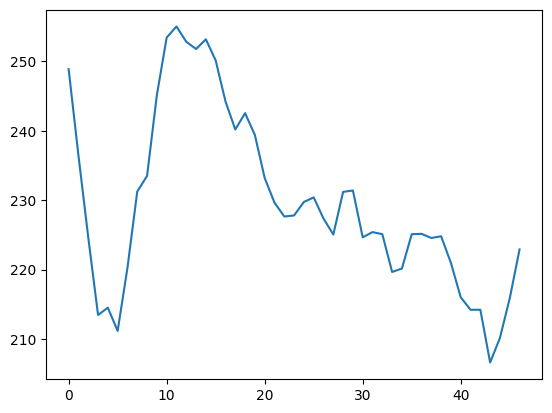

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
print(df1)

[[0.87306482]
 [0.61609892]
 [0.37254879]
 [0.14138269]
 [0.16305458]
 [0.09391101]
 [0.28173364]
 [0.50877184]
 [0.55521147]
 [0.79566544]
 [0.96697614]
 [1.        ]
 [0.95459242]
 [0.93292053]
 [0.96181618]
 [0.89886462]
 [0.77708971]
 [0.69349831]
 [0.74200205]
 [0.67698638]
 [0.54901946]
 [0.47574798]
 [0.4344683 ]
 [0.43756446]
 [0.47781208]
 [0.49122785]
 [0.4282766 ]
 [0.38080492]
 [0.50773978]
 [0.51186769]
 [0.37254879]
 [0.38802867]
 [0.38183697]
 [0.26934961]
 [0.27966953]
 [0.38183697]
 [0.38286871]
 [0.370485  ]
 [0.37564496]
 [0.29618146]
 [0.19401434]
 [0.15686257]
 [0.15686257]
 [0.        ]
 [0.07327117]
 [0.19091848]
 [0.33642908]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(30, 17)

In [ ]:
train_data

array([[0.87306482],
       [0.61609892],
       [0.37254879],
       [0.14138269],
       [0.16305458],
       [0.09391101],
       [0.28173364],
       [0.50877184],
       [0.55521147],
       [0.79566544],
       [0.96697614],
       [1.        ],
       [0.95459242],
       [0.93292053],
       [0.96181618],
       [0.89886462],
       [0.77708971],
       [0.69349831],
       [0.74200205],
       [0.67698638],
       [0.54901946],
       [0.47574798],
       [0.4344683 ],
       [0.43756446],
       [0.47781208],
       [0.49122785],
       [0.4282766 ],
       [0.38080492],
       [0.50773978],
       [0.51186769]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(24, 5)
(24,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(11, 5)
(11,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(5,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 5, 50)             20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=4,verbose=1)

Epoch 1/100
6/6 [==============================] - 6s 234ms/step - loss: 0.4040 - val_loss: 0.0384
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 0.2493 - val_loss: 0.0151
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.1073 - val_loss: 0.0950
Epoch 4/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0776 - val_loss: 0.1114
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0636 - val_loss: 0.0588
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0596 - val_loss: 0.0527
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0599 - val_loss: 0.0737
Epoch 8/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0545 - val_loss: 0.0819
Epoch 9/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0562 - val_loss: 0.0915
Epoch 10/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0544 - val_loss: 0.0859
Epoch 11/100
6/6 [

In [ ]:
import tensorflow as tf

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


1/1 [==============================] - 0s 18ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

236.3717242634378

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

229.59203795313772

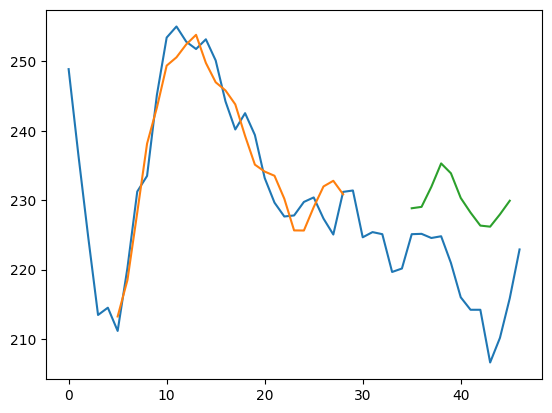

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=5
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

17

In [ ]:
x_input = test_data[12:].reshape(1,-1)

In [ ]:
x_input.shape

(1, 5)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
  # demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=14
i=0
while(i<10):

    if(len(temp_input)>14):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [ 1.01524436  0.61107892  0.17515159 -0.23453733 -0.6036675  -0.90906787
 -1.14151704 -1.30245972 -1.39339924 -1.42183435 -1.38779354 -1.26755822
 -0.99016297 -0.36417696]
0 day output [[1.0675286]]
1 day input [ 0.61107892  0.17515159 -0.23453733 -0.6036675  -0.90906787 -1.14151704
 -1.30245972 -1.39339924 -1.42183435 -1.38779354 -1.26755822 -0.99016297
 -0.36417696  1.06752861]
1 day output [[3.245749]]
2 day input [ 0.17515159 -0.23453733 -0.6036675  -0.90906787 -1.14151704 -1.30245972
 -1.39339924 -1.42183435 -1.38779354 -1.26755822 -0.99016297 -0.36417696
  1.06752861  3.245749  ]
2 day output [[5.092202]]
3 day input [-0.23453733 -0.6036675  -0.90906787 -1.14151704 -1.30245972 -1.39339924
 -1.42183435 -1.38779354 -1.26755822 -0.99016297 -0.36417696  1.06752861
  3.245749    5.09220219]
3 day output [[6.2148147]]
4 day input [-0.6036675  -0.90906787 -1.14151704 -1.30245972 -1.39339924 -1.42183435
 -1.38779354 -1.26755822 -0.99016297 -0.36417696  1.06752861  3.245749
  

In [ ]:
day_new=np.arange(1,15)
day_pred=np.arange(15,25)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

47

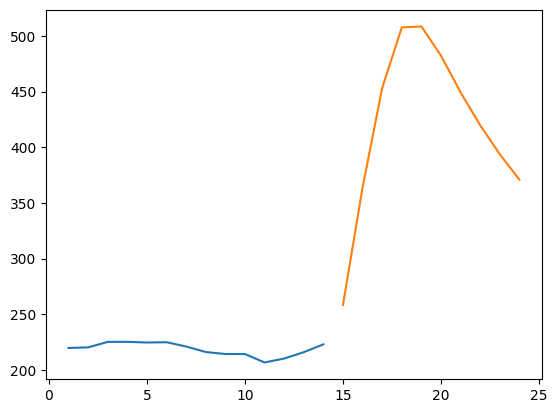

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[33:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))